## Attempt to find the right function to determine death rate according to Age and Gender

### Using the data from Italy up to 26 March 2020

In [1]:
import pandas as pd

males_df = pd.read_csv('data/italy_male_deaths.csv')
females_df = pd.read_csv('data/italy_female_deaths.csv')

In [2]:
males_df['death_rate'] = males_df['num_deaths'] / males_df['num_cases']
females_df['death_rate'] = females_df['num_deaths'] / females_df['num_cases']

### Linear Regression

#### Males

In [3]:
from sklearn.linear_model import LinearRegression
import numpy as np

male_deathrates = males_df['death_rate'].to_numpy().reshape(-1, 1)
x_vals = np.array(list(range(len(males_df)))).reshape(-1, 1)

mdr_linreg = LinearRegression().fit(x_vals, male_deathrates)
mdr_linreg_preds = mdr_linreg.predict(x_vals)
mdr_linreg_score = mdr_linreg.score(x_vals, male_deathrates)

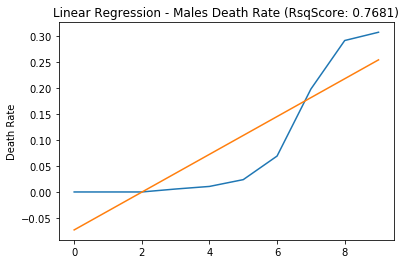

In [4]:
import matplotlib.pyplot as plt

plt.plot(male_deathrates[:, 0])
plt.plot(mdr_linreg_preds[:, 0])
plt.title('Linear Regression - Males Death Rate (RsqScore: %.4f)' % mdr_linreg_score)
plt.ylabel('Death Rate')
plt.show()

#### Females

In [5]:
female_deathrates = females_df['death_rate'].to_numpy().reshape(-1, 1)
x_vals = np.array(list(range(len(males_df)))).reshape(-1, 1)

fdr_linreg = LinearRegression().fit(x_vals, female_deathrates)
fdr_linreg_preds = fdr_linreg.predict(x_vals)
fdr_linreg_score = fdr_linreg.score(x_vals, female_deathrates)

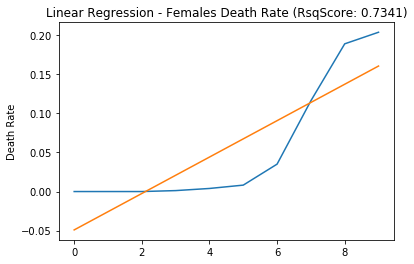

In [6]:
plt.plot(female_deathrates[:, 0])
plt.plot(fdr_linreg_preds[:, 0])
plt.title('Linear Regression - Females Death Rate (RsqScore: %.4f)' % fdr_linreg_score)
plt.ylabel('Death Rate')
plt.show()

### Linear Regression forcing Non-Negative Values

In [7]:
def squared_error(ys_orig,ys_line):
    return sum((ys_line - ys_orig) * (ys_line - ys_orig))

def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [np.mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)

#### Males

In [8]:
new_mdr_linreg_preds = np.zeros(mdr_linreg_preds.shape)
for i in range(len(mdr_linreg_preds)):
    if mdr_linreg_preds[i][0] < 0:
        new_mdr_linreg_preds[i][0] = 0
    else:
        new_mdr_linreg_preds[i][0] = mdr_linreg_preds[i][0]
        
new_mdr_linreg_score = coefficient_of_determination(male_deathrates, new_mdr_linreg_preds)

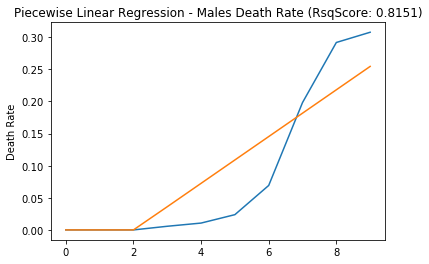

In [9]:
plt.plot(male_deathrates[:, 0])
plt.plot(new_mdr_linreg_preds[:, 0])
plt.title('Piecewise Linear Regression - Males Death Rate (RsqScore: %.4f)' % new_mdr_linreg_score[0])
plt.ylabel('Death Rate')
plt.show()

#### Females

In [10]:
new_fdr_linreg_preds = np.zeros(fdr_linreg_preds.shape)
for i in range(len(fdr_linreg_preds)):
    if fdr_linreg_preds[i][0] < 0:
        new_fdr_linreg_preds[i][0] = 0
    else:
        new_fdr_linreg_preds[i][0] = fdr_linreg_preds[i][0]
        
new_fdr_linreg_score = coefficient_of_determination(female_deathrates, new_fdr_linreg_preds)

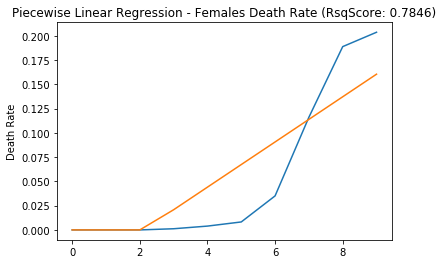

In [11]:
plt.plot(female_deathrates[:, 0])
plt.plot(new_fdr_linreg_preds[:, 0])
plt.title('Piecewise Linear Regression - Females Death Rate (RsqScore: %.4f)' % new_fdr_linreg_score[0])
plt.ylabel('Death Rate')
plt.show()